<a href="https://colab.research.google.com/github/Artcods/Artcods/blob/main/Statistika_tubes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**ANALISIS FAKTOR PENYEBAB OBESITAS DARI NEGARA MEKSIKO, PERU DAN KOLOMBIA**

---

Penelitian ini bertujuan untuk menganalisis faktor – faktor yang dapat
mempangaruhi tingkat obesitas dari negara Meksiko, Peru dan Kolombia berdasarkan kondisi fisik dan kebiasannya. Penulis menggunakan data yang diperoleh dari website resmi kaggle yang diperoleh dari UC Irvine Machine Learning oleh Fabio Mendoza Palechor dan Alexis De la Hoz Manotas  pada tahun 2019 yang berisi 17 atribut dan  2112 record yang diberi label dengan variabel kelas NObesity (Tingkat Obesitas) yang memungkinkan klasifikasi data menggunakan nilai  Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. Dataset yang digunakan merupakan hasil survey pada responden di tiga negara, yaitu Meksiko, Peru dan Kolombia yang berhubungan dengan tingkat obesitas individu. Informasi yang terdapat dalam dataset tersebut diperoleh dari survey melalui platform web dimana responden mengevaluasi pola makan serta aspek lainnya terkait kondisi fisik mereka. Dataset ini menarik untuk diolah karena memuat berbagai macam aspek untuk mengetahui kaitannya dengan obesitas.

Adapun alasan kami memilih dataset ini sebagai fokus penelitian kami

1.  Obesitas merupakan masalah kesehatan utama yang mempengaruhi jutaan orang di seluruh dunia yang berkontribusi pada beberapa penyakit kronis paling umum dan mematikan. Menurut WHO Prevalensi obesitas di seluruh dunia hampir tiga kali lipat antara tahun 1975 dan 2016.
2. Dataset ini menyediakan informasi yang komprehensif tentang kebiasaan makan, aktivitas fisik, riwayat keluarga, dan kebiasaan gaya hidup lainnya sehingga memungkinkan kami untuk melakukan analisis yang mendalam untuk menghasilkan insight yang bermakna.


# **METODE** **PENELITIAN**

1. Identifikasi masalah

2. Pengumpulan data

3. Preprocessing data: Preprocessing data meliputi pembersihan data, pengubahan data menjadi bentuk yang sesuai dengan kebutuhan analisis, dan penghapusan data yang tidak valid. Pada tahap ini, setiap tabel yang mempunyai data bertipe string/text akan diubah menjadi bentuk numerikal melalui proses label encoding, sehingga masing-masing dari string/text akan menjadi deretan angka yang akan mewakili setiap variasi teks dan setiap tabel yang berisi angka desimal akan dibulatkan.

4. Analisis data: Setelah data dipersiapkan, visualisasi pertama yang dilakukan adalah menggunakan pie/bar charts untuk melihat distribusi data. setelah itu, untuk menganalisis hubungan antara variabel, digunakan heatmap korelasi untuk menampilkan tingkat korelasi antara setiap pasangan variabel.   

5. Hasil dan interpretasi

6. Kesimpulan

### **Insight**

1. Korelasi antara frekuensi konsumsi alkohol dan obesity level
2. Korelasi antara frekuensi konsumsi makanan cepat saji dan obesity level
3. Korelasi antara frekuensi konsumsi sayuran dan obesity level
4. Korelasi antara frekuensi konsumsi makanan utama dan obesity level
5. Korelasi antara frekuensi konsumsi perhitungan kalori dan obesity level
6. Korelasi antara frekuensi merokok dan obesity level -
7. Korelasi antara frekuensi konsumsi air putih dan obesity level -
8. Korelasi antara frekuensi genetik dan obesity level
9. Korelasi antara frekuensi aktifitas fisik dan obesity level
10. Korelasi antara frekuensi penggunaan teknologi dan obesity level
11. Korelasi antara frekuensi konsumsi snack dan obesity level

### **Requirement Library/Package**


---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import kstest
from scipy import stats

### **Upload** **Dataset**


---



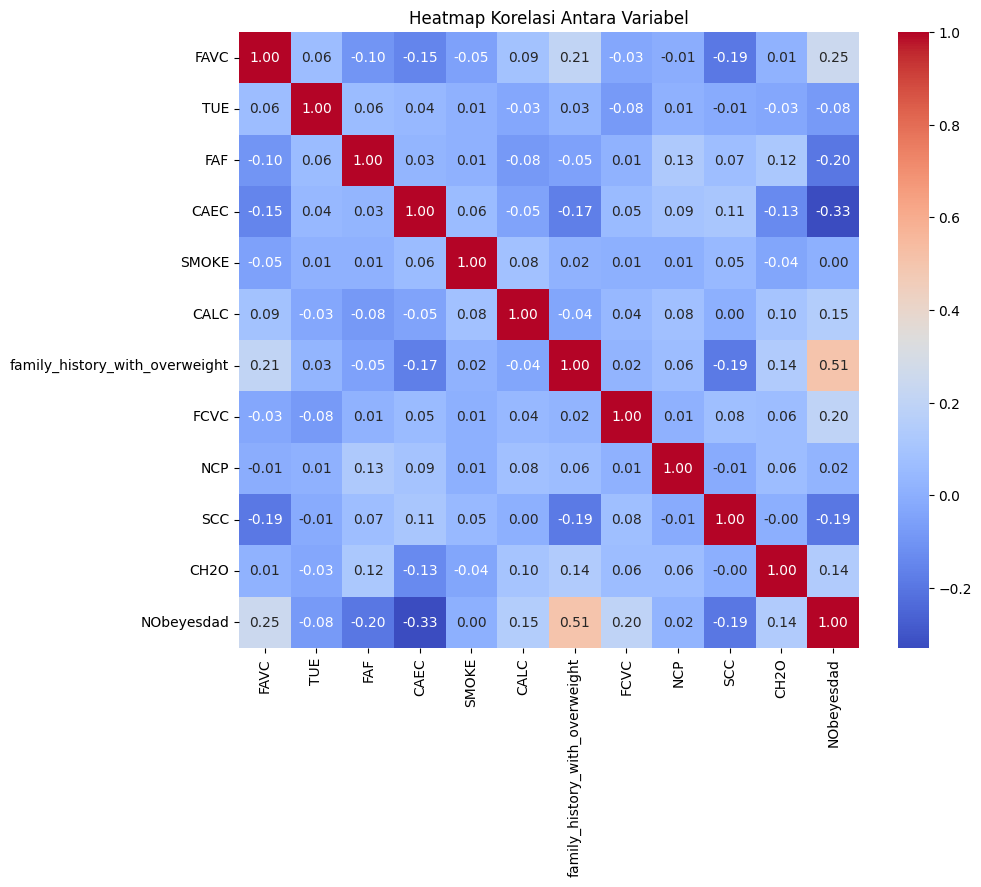

In [4]:

# Hitung korelasi antar variabel
correlation_matrix = obesity[['FAVC', 'TUE', 'FAF', 'CAEC', 'SMOKE', 'CALC', 'family_history_with_overweight', 'FCVC', 'NCP', 'SCC', 'CH2O', 'NObeyesdad']].corr()

# Buat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antara Variabel')
plt.show()

In [3]:
obesity = pd.read_csv ("https://raw.githubusercontent.com/Artcods/Artcods/main/ObesityDataSet_2112.csv")

**Explore** **Data**


---



In [ ]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   int64  
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   int64  
 4   CALC                            2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   SCC                             2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   int64  
 11  family_history_with_overweight  2111 non-null   int64  
 12  FAF                             21

In [ ]:
obesity.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,0,0,2,3,0,0,2,1,0,1,1,Public_Transportation,1
1,21,Female,1.52,56,1,0,3,3,1,1,3,1,3,0,1,Public_Transportation,1
2,23,Male,1.80,77,2,0,2,3,0,0,2,1,2,1,1,Public_Transportation,1
3,27,Male,1.80,87,2,0,3,3,0,0,2,0,2,0,1,Walking,2
4,22,Male,1.78,90,1,0,2,1,0,0,2,0,0,0,1,Public_Transportation,3


Keterangan


---


- **Gender**: Feature, Categorical, "Gender"
- **Age** : Feature, Continuous, "Age"
- **Height**: Feature, Continuous
- **Weight**: Feature Continuous
- **family_history_with_overweight**: Feature, Binary, " Has a family member suffered or suffers from overweight? "

- **FAVC** : Feature, Binary, " Do you eat high caloric food frequently? "
- **FCVC** : Feature, Integer, " Do you usually eat vegetables in your meals? "
- **NCP** : Feature, Continuous, " How many main meals do you have daily? "
- **CAEC** : Feature, Categorical, " Do you eat any food between meals? "
- **SMOKE** : Feature, Binary, " Do you smoke? "
- **CH2O**: Feature, Continuous, " How much water do you drink daily? "
- **SCC**: Feature, Binary, " Do you monitor the calories you eat daily? "
- **FAF**: Feature, Continuous, " How often do you have physical activity? "
- **TUE** : Feature, Integer, " How much time do you use technological devices - **such** as cell phone, videogames, television, computer and others? "

- **CALC** : Feature, Categorical, " How often do you drink alcohol? "
- **MTRANS** : Feature, Categorical, " Which transportation do you usually use? "
- **NObeyesdad** : Target, Categorical, "Obesity level"

**DATA CLEANING**


---



In [ ]:
# Mengecek missing values di seluruh kolom
missing_values = obesity.isnull().sum()
print("Jumlah missing values di setiap kolom:\n", missing_values)

Jumlah missing values di setiap kolom:
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [17]:
# Menghitung jumlah masing-masing gander
gender_counts = (obesity['SMOKE'] == 1).sum()

# Menampilkan hasil
print(gender_counts)

44


In [14]:
jumlah_ya = obesity['SMOKE'].value_counts().get('1', 0)

print(f"Jumlah '1' dalam kolom 'buku': {jumlah_ya}")

Jumlah 'ya' dalam kolom 'buku': 0


In [25]:
n = obesity['SMOKE'].count()  # Total jumlah observasi
x = (obesity['SMOKE'] == 1).sum() # Jumlah Yes
p_hat = x / n  # Proporsi sampel

# Hipotesis
p_0 = 0.5  # Proporsi yang diuji

# Menghitung standar error
SE = np.sqrt(p_0 * (1 - p_0) / n)

# Menghitung statistik uji z
z = (p_hat - p_0) / SE

# Menghitung nilai p (dua sisi)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Output
print(f"Proporsi sampel (p̂): {p_hat}")
print(f"Statistik uji (z): {z}")
print(f"Nilai p (p-value): {p_value}")

# Keputusan
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.")
else:
    print("Gagal menolak H0: Tidak ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.")

Proporsi sampel (p̂): 0.020843202273803884
Statistik uji (z): -44.030312326852616
Nilai p (p-value): 0.0
Tolak H0: Ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.


In [7]:
n = obesity['FAVC'].count()  # Total jumlah observasi
x = (obesity['FAVC'] == 1).sum() # Jumlah Yes
p_hat = x / n  # Proporsi sampel

# Hipotesis
p_0 = 0.5  # Proporsi yang diuji

# Menghitung standar error
SE = np.sqrt(p_0 * (1 - p_0) / n)

# Menghitung statistik uji z
z = (p_hat - p_0) / SE

# Menghitung nilai p (dua sisi)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Output
print(f"Proporsi sampel (p̂): {p_hat}")
print(f"Statistik uji (z): {z}")
print(f"Nilai p (p-value): {p_value}")

# Keputusan
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.")
else:
    print("Gagal menolak H0: Tidak ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.")

Proporsi sampel (p̂): 0.8839412600663192
Statistik uji (z): 35.28083849818492
Nilai p (p-value): 0.0
Tolak H0: Ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.


In [12]:
n = obesity['SCC'].count()  # Total jumlah observasi
x = (obesity['SCC'] == 0).sum() # Jumlah Yes
p_hat = x / n  # Proporsi sampel

# Hipotesis
p_0 = 0.5  # Proporsi yang diuji

# Menghitung standar error
SE = np.sqrt(p_0 * (1 - p_0) / n)

# Menghitung statistik uji z
z = (p_hat - p_0) / SE

# Menghitung nilai p (dua sisi)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Output
print(f"Proporsi sampel (p̂): {p_hat}")
print(f"Statistik uji (z): {z}")
print(f"Nilai p (p-value): {p_value}")

# Keputusan
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.")
else:
    print("Gagal menolak H0: Tidak ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.")

Proporsi sampel (p̂): 0.9545239223117006
Statistik uji (z): 41.76676685873958
Nilai p (p-value): 0.0
Tolak H0: Ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.


In [6]:
n = obesity['family_history_with_overweight'].count()  # Total jumlah observasi
x = (obesity['family_history_with_overweight'] == 1).sum() # Jumlah Yes
p_hat = x / n  # Proporsi sampel

# Hipotesis
p_0 = 0.5  # Proporsi yang diuji

# Menghitung standar error
SE = np.sqrt(p_0 * (1 - p_0) / n)

# Menghitung statistik uji z
z = (p_hat - p_0) / SE

# Menghitung nilai p (dua sisi)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Output
print(f"Proporsi sampel (p̂): {p_hat}")
print(f"Statistik uji (z): {z}")
print(f"Nilai p (p-value): {p_value}")

# Keputusan
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.")
else:
    print("Gagal menolak H0: Tidak ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.")

Proporsi sampel (p̂): 0.817621980104216
Statistik uji (z): 29.18667762249598
Nilai p (p-value): 0.0
Tolak H0: Ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.


In [19]:
n = obesity['TUE'].count()  # Total jumlah observasi
x = (obesity['TUE'] == 1).sum() # Jumlah Yes
p_hat = x / n  # Proporsi sampel

# Hipotesis
p_0 = 0.5  # Proporsi yang diuji

# Menghitung standar error
SE = np.sqrt(p_0 * (1 - p_0) / n)

# Menghitung statistik uji z
z = (p_hat - p_0) / SE

# Menghitung nilai p (dua sisi)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Output
print(f"Proporsi sampel (p̂): {p_hat}")
print(f"Statistik uji (z): {z}")
print(f"Nilai p (p-value): {p_value}")

# Keputusan
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.")
else:
    print("Gagal menolak H0: Tidak ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.")

Proporsi sampel (p̂): 0.4334438654666035
Statistik uji (z): -6.1159257359592605
Nilai p (p-value): 9.599803174609178e-10
Tolak H0: Ada cukup bukti untuk menyimpulkan bahwa proporsi berbeda dari 0,5.


**Proposi Obesitas berdasarkan Jenis Kelamin**

Male      1068
Female    1043


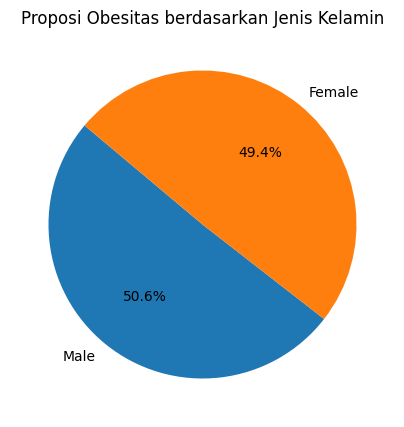

In [ ]:
# Menghitung jumlah masing-masing gander
gender_counts = obesity['Gender'].value_counts()

# Menampilkan hasil
print(gender_counts.to_string(index=True, header=False))

# Membuat pie chart
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Proposi Obesitas berdasarkan Jenis Kelamin')

# Menampilkan pie chart
plt.show()

Proporsi Obesitas berdasarkan Usia


---



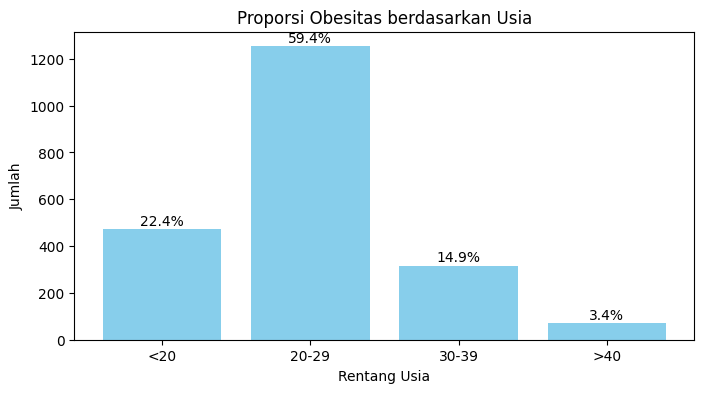

In [ ]:
# Mengelompokkan usia ke dalam rentang
bins = [0, 20, 30, 40, float('inf')]
labels = ['<20', '20-29', '30-39', '>40']
obesity['AgeGroup'] = pd.cut(obesity['Age'], bins=bins, labels=labels, right=False)

#Menghitung jumlah masing-masing rentang usia
age_group_counts = obesity['AgeGroup'].value_counts().sort_index()

# Menghitung persentase masing-masing rentang usia
age_group_percentages = (age_group_counts/age_group_counts.sum()) * 100

# Membuat bar chart
plt.figure(figsize=(8, 4))
bars = plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')

# Menambahkan persentase sebagai label pada setiap bar
for bar, percentage in zip(bars, age_group_percentages):
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{percentage:.1f}%', ha='center', va='bottom')

#Menambahkan judul dan label sumbu
plt.title('Proporsi Obesitas berdasarkan Usia')
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah')

# Menampilkan bar chart
plt.show()

Proporsi Kategori Obesitas


---



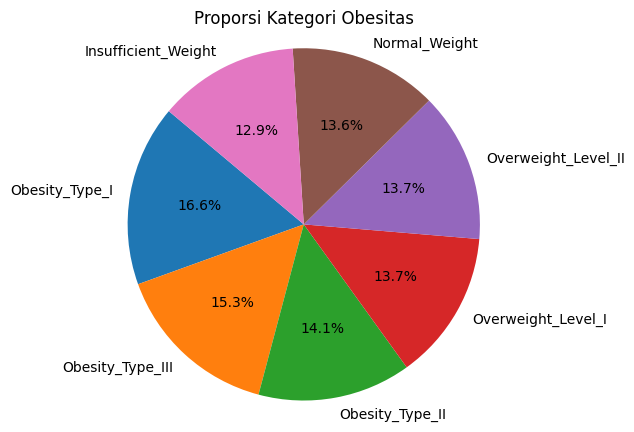

In [ ]:
# Menghitung jumlah kasus dalam setiap kategori
kategori_counts = obesity['NObeyesdad'].value_counts()

# Mapping dari label asli ke label deskriptif
label_mapping = {
    '0': 'Insufficient_Weight',
    '1': 'Normal_Weight',
    '2': 'Overweight_Level_I',
    '3': 'Overweight_Level_II',
    '4': 'Obesity_Type_I',
    '5': 'Obesity_Type_II',
    '6': 'Obesity_Type_III',
}

# Mengganti label dengan label deskriptif
descriptive_labels = [label_mapping[str(label)] for label in kategori_counts.index]

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(kategori_counts, labels=descriptive_labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Kategori Obesitas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Dari visualisasi di atas, penyandang obesitas berdasarkan jenis kelamin cukup seimbang antara perempuan dan laki-laki dengan sedikit selisih persentase. Sementara itu, penyandang obesitas didominasi oleh responden berusia dua puluh sampai dengan dua puluh sembilan tahun, lebih dari setengah dari total responden penyandang obesitas. Rentang usia tersebut merupakan kelompok umur dewasa dan produktif. Tingginya angka obesitas pada rentang usia produktif kemungkinan besar dikarenakan gaya hidup sedenter atau malas bergerak. Hal ini dapat disebabkan oleh rutinitas pekerjaan yang mengharuskan duduk dalam waktu yang lama dalam sehari.

Kembali merujuk pada visualisasi di atas, jumlah keseluruhan responden yang mengalami obesitas mencapai 46% atau hampir separuh total jumlah responden. Setelah dirinci lebih lanjut, proporsi obesitas terbagi kembali menjadi tiga tipe. Jumlah penyandang dari ketiga tipe tersebut memiliki proporsi yang cukup serupa antara satu dan lainnya.

### **Explanatory and Visualization**

---



**Korelasi antara frekuensi merokok dan obesity level**

Korelasi antara frekuensi merokok dan obesity level: 0.0034421790751232974


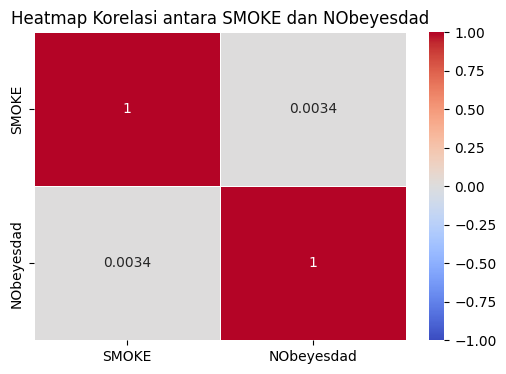

In [ ]:
# Hitung korelasi antara 'SMOKE' dan 'NObeyesdad'
correlation = obesity['SMOKE'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi merokok dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'SMOKE' dan 'NObeyesdad'
subset = obesity[['SMOKE', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara SMOKE dan NObeyesdad')
plt.show()

Berdasarkan hasil visualisasi dengan heatmap korelasi dapat dilihat bahwa merokok memiliki korelasi postif yang sangat lemah terhadap Tingkat Obesitas  dengan nilai koefesien korelasi sebesar 0.0034. Artinya, semakin tinggi konsumsi alkoholnya, semakin tinggi tingkat obesitas.

**Korelasi antara frekuensi konsumsi air putih dan obesity level**

---



0.13817078773960842


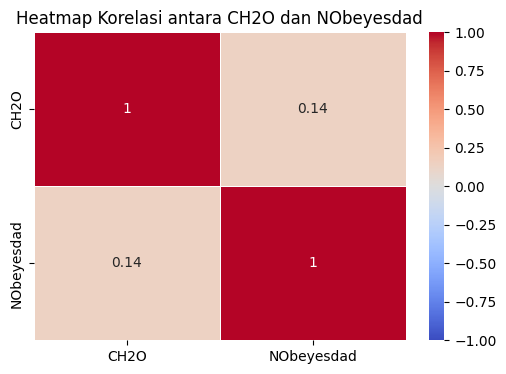

In [ ]:
correlation_ch2o = obesity['CH2O'].corr(obesity['NObeyesdad'])
print(correlation_ch2o)

# Membuat DataFrame dengan hanya kolom 'CH2O' dan 'NObeyesdad'
subset = obesity[['CH2O', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CH2O dan NObeyesdad')
plt.show()

Berdasarkan hasil visualisasi dengan heatmap korelasi dapat dilihat bahwa konsumsi air putih memiliki korelasi postif yang lemah terhadap Tingkat Obesitas  dengan nilai koefesien korelasi sebesar 0.14. Artinya, semakin tinggi konsumsi air putihnya, semakin tinggi tingkat obesitas.

**Korelasi antara frekuensi konsumsi makanan tinggi kalori dan obesity level**

Korelasi antara frekuensi konsumsi makanan tinggi kalori dan obesity level: 0.2477932000502839


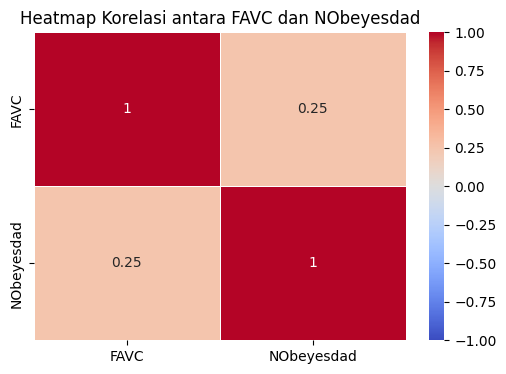

In [ ]:
# Hitung korelasi antara 'FAVC' dan 'NObeyesdad'
correlation = obesity['FAVC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi makanan tinggi kalori dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'FAVC' dan 'NObeyesdad'
subset = obesity[['FAVC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara FAVC dan NObeyesdad')
plt.show()

Berdasarkan hasil visualisasi dengan heatmap korelasi dapat dilihat bahwa konsumsi makanan cepat saji memiliki korelasi postif yang lemah terhadap Tingkat Obesitas  dengan nilai koefesien korelasi sebesar 0.25. Artinya, semakin tinggi konsumsi makanan cepat sajinya, semakin tinggi tingkat obesitas.

**Korelasi antara frekuensi konsumsi makanan utama dan obesity level**

Korelasi antara frekuensi konsums makanan utama dan obesity level: 0.020931418594241746


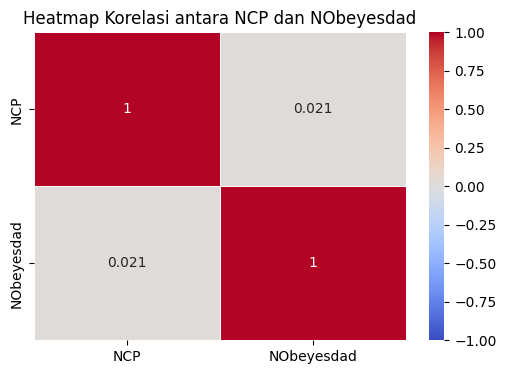

In [ ]:
# Hitung korelasi antara 'NCP' dan 'NObeyesdad'
correlation = obesity['NCP'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsums makanan utama dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'NCP' dan 'NObeyesdad'
subset = obesity[['NCP', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara NCP dan NObeyesdad')
plt.show()

Berdasarkan hasil visualisasi dengan heatmap korelasi dapat dilihat bahwa konsumsi makanan utama memiliki korelasi positif yang sangat lemah terhadap Tingkat Obesitas dengan nilai koefesien korelasi sebesar 0.021. Artinya, semakin tinggi konsumsi makanan utamanya, semakin tinggi tingkat obesitas, begitu juga sebaliknya.

**Korelasi antara frekuensi konsumsi sayuran dan obesity level**

Korelasi antara frekuensi konsumsi sayuran dan obesity level: 0.19570521334325744


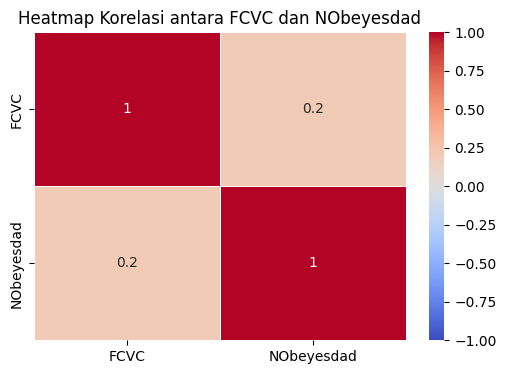

In [ ]:
# Hitung korelasi antara 'FCVC' dan 'NObeyesdad'
correlation = obesity['FCVC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi sayuran dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'FCVC' dan 'NObeyesdad'
subset = obesity[['FCVC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara FCVC dan NObeyesdad')
plt.show()

Berdasarkan hasil visualisasi dengan heatmap korelasi dapat dilihat bahwa konsumsi sayuran memiliki korelasi postif yang lemah terhadap Tingkat Obesitas  dengan nilai koefesien korelasi sebesar 0.2. Artinya, semakin tinggi konsumsi sayurannya, semakin tinggi tingkat obesitas.

**Korelasi meminum alkohol (CALC) dengan obesity level**

Korelasi antara frekuensi konsumsi alkohol dan obesity level: 0.1517523222990246


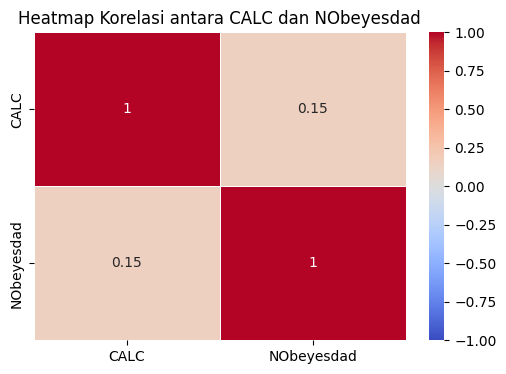

In [ ]:
# Hitung korelasi antara 'CALC' dan 'NObeyesdad'
correlation = obesity['CALC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi alkohol dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['CALC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

Berdasarkan hasil visualisasi dengan heatmap korelasi dapat dilihat bahwa Konsumsi alkohol memiliki korelasi postif yang sangat lemah terhadap Tingkat Obesitas  dengan nilai koefesien korelasi sebesar 0.15. Artinya, semakin tinggi konsumsi alkoholnya, semakin tinggi tingkat obesitas.

**Korelasi memantau kalori yang dimakan (SCC) dengan obesity lavel**

Korelasi antara frekuensi memantau kalori yang dimakan dan obesity level : -0.19450765594046907


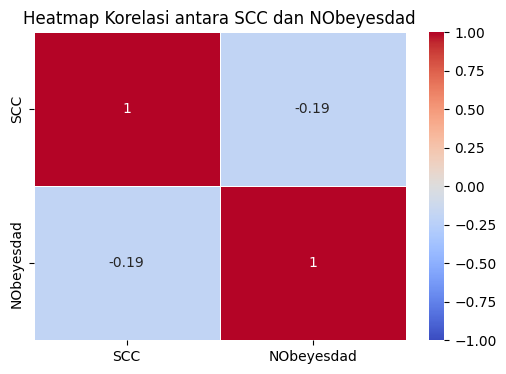

In [ ]:
correlation = obesity['SCC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi memantau kalori yang dimakan dan obesity level : {correlation}')

# Membuat DataFrame dengan hanya kolom 'SCC' dan 'NObeyesdad'
subset = obesity[['SCC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara SCC dan NObeyesdad')
plt.show()

Berdasarkan hasil visualisasi dengan heatmap korelasi dapat dilihat bahwa perhitungan  kalori makanan yang dikonsumsi memiliki korelasi negatif yang sangat lemah terhadap Tingkat Obesitas dengan nilai koefesien korelasi sebesar –0.19. Artinya, semakin tinggi perhitungan  kalori makanan yang dikonsumsinya, semakin rendah tingkat obesitas, begitu juga sebaliknya.

 **Korelasi menggunakan teknologi (TUE) dengan obesity lavel**

Korelasi antara frekuensi menggunakan teknologi dan obesity level : -0.07952809474559348


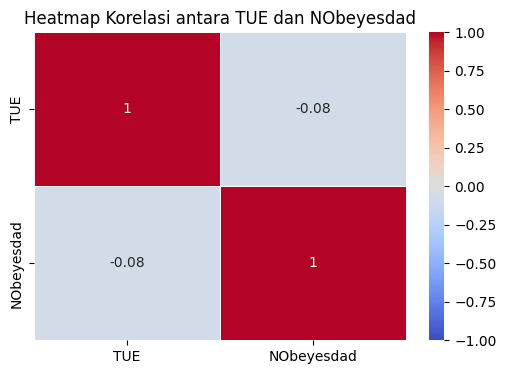

In [ ]:
correlation = obesity['TUE'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi menggunakan teknologi dan obesity level : {correlation}')

# Membuat DataFrame dengan hanya kolom 'TUE' dan 'NObeyesdad'
subset = obesity[['TUE', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara TUE dan NObeyesdad')
plt.show()

Berdasarkan hasil visualisasi dengan heatmap korelasi dapat dilihat bahwa durasi penggunaan teknologi memiliki korelasi negatif yang sangat lemah terhadap Tingkat Obesitas  dengan nilai koefesien korelasi sebesar –0.08. Artinya, semakin tinggi penggunaan teknologinya, semakin rendah tingkat obesitas, begitu juga sebaliknya.

**makan** **makanan** **apa** **pun** **di** **antara** **waktu** **makan**(**CAEC**)

Korelasi antara frekuensi konsumsi snack dan obesity level: -0.32934971630039905


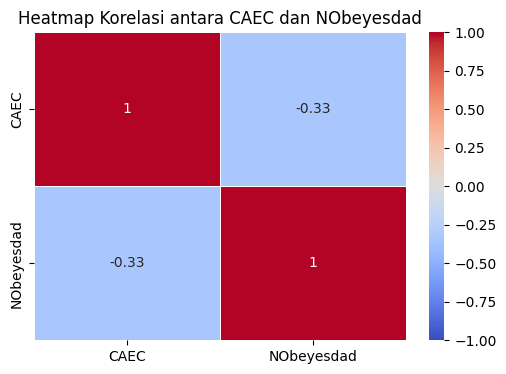

In [ ]:
# Hitung korelasi antara 'CAEC' dan 'NObeyesdad'
correlation = obesity['CAEC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi snack dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'CAEC' dan 'NObeyesdad'
subset = obesity[['CAEC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CAEC dan NObeyesdad')
plt.show()

Berdasarkan hasil visualisasi dengan heatmap korelasi dapat dilihat bahwa konsumsi snack memiliki korelasi negatif yang lemah terhadap Tingkat Obesitas  dengan nilai koefesien korelasi sebesar –0.33. Artinya, semakin tinggi konsumsi snacknya, semakin rendah tingkat obesitas, begitu juga sebaliknya.

**Korelasi antara frekuensi aktifitas fisik dan obesity level**



Korelasi antara frekuensi aktifitas fisik dan obesity level: -0.1971863309546405


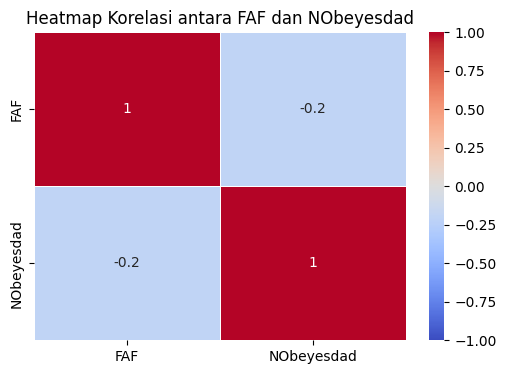

In [ ]:
# Hitung korelasi antara 'FAF' dan 'NObeyesdad'
correlation = obesity['FAF'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi aktifitas fisik dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'FAF' dan 'NObeyesdad'
subset = obesity[['FAF', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara FAF dan NObeyesdad')
plt.show()

Berdasarkan hasil visualisasi dengan heatmap korelasi dapat dilihat bahwa aktifitas fisik memiliki korelasi negatif yang lemah terhadap Tingkat Obesitas  dengan nilai koefesien korelasi sebesar -0.2. Artinya, semakin tinggi aktifitas fisiknya, semakin rendah tingkat obesitas, begitu juga sebaliknya.

# **KESIMPULAN**


Analisis serta visualisasi data yang telah dijelaskan sebelumnya dapat dijadikan referensi khususnya bagi masyarakat Meksiko, Peru dan Kolombia dalam melakukan tindakan preventif dari segi pola makan serta gaya hidup untuk mencegah dan menurunkan angka obesitas.

Pertama-tama, dikarenakan jumlah penderita obesitas didominasi oleh individu pada usia 20–29 tahun, disarankan bagi masyarakat dalam kelompok umur tersebut untuk meningkatkan aktivitas fisik di sela-sela bekerja. Menumbuhkan kebiasaan berjalan kaki dapat menjadi salah satu opsi paling mudah dan terjangkau.

Kemudian, masyarakat disarankan untuk mengurangi dan meniadakan konsumsi makanan berkalori tinggi karena ini salah satu faktor utama penyebab obesitas. Hal ini dapat dilakukan dengan mengontrol kalori harian pada makanan yang dikonsumsi. Kontrol kalori harian harus ditunjang dengan aktivitas fisik yang memadai agar dapat mencapai berat badan yang dikategorikan sehat. Penting diingat, berat badan yang ideal akan mengecilkan peluang terkena obesitas bagi keturunan selanjutnya. Maka, pola makan yang teratur serta aktivitas fisik rutin merupakan gaya hidup yang baik dan berkesinambungan sebagai pencegahan utama obesitas.

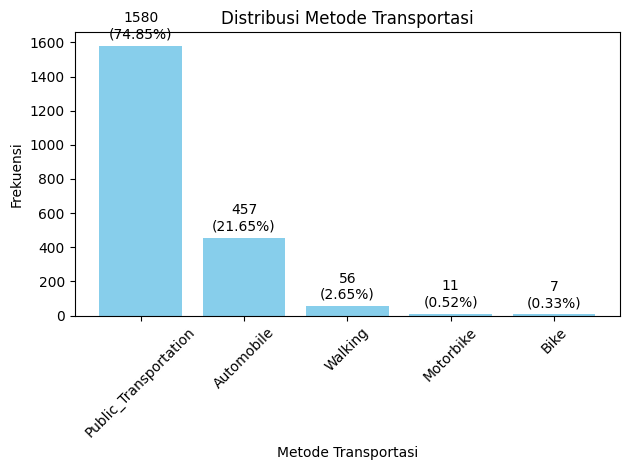

In [ ]:


# Menghitung distribusi frekuensi
frequency = obesity['MTRANS'].value_counts()
percentage = obesity['MTRANS'].value_counts(normalize=True) * 100

# Membuat bar chart
fig, ax = plt.subplots()

bars = ax.bar(frequency.index, frequency, color='skyblue')

# Menambahkan persentase di atas setiap batang
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}\n({height / len(obesity) * 100:.2f}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # offset
                textcoords="offset points",
                ha='center', va='bottom')

# Menambahkan judul dan label sumbu
ax.set_title('Distribusi Metode Transportasi')
ax.set_xlabel('Metode Transportasi')
ax.set_ylabel('Frekuensi')

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
